<a href="https://colab.research.google.com/github/Nandini-panda/AI_DS/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

#set random seed for reproducibility
np.random.seed(45)

#generate synthetic data (1000 samples)
size= np.random.randint(500,5000,1000)
bedrooms= np.random.randint(1,6,1000)
location= np.random.randint(1,11,1000)
age= np.random.randint(1,51,1000)

#Generate houseprice with some noise
price= (size * 300) + (bedrooms * 50000) + (location * 20000) - (age * 2000) + np.random.randint(-20000,20000,1000)

#Create dataframe
df= pd.DataFrame({"Size": size, "Bedroom": bedrooms, "Location": location, "Age": age, "Price": price})

#save to csv
csv_filename= "house_price_data.csv"
df.to_csv(csv_filename, index=False)

print (f"Dataset saved as'{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset saved as'house_price_data.csv' with 1000 rows and 5 columns.


In [ ]:
import pandas as pd

#load dataset
df= pd.read_csv("house_price_data.csv")

#Display first 5 rows
print(df.head())

   Size  Bedroom  Location  Age    Price
0  4116        3         2   44  1354277
1   663        1         4    1   342128
2  1080        3         8   18   610793
3  4973        5         2   30  1711119
4  4204        2         4   37  1372464


In [ ]:
#check for missing values
print(df.isnull().sum())

#summary statistic
print(df.describe())

Size        0
Bedroom     0
Location    0
Age         0
Price       0
dtype: int64
             Size      Bedroom     Location          Age         Price
count  1000.00000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2780.50100     2.958000     5.573000    25.573000  1.042134e+06
std    1332.46039     1.412172     2.869653    14.466096  4.144661e+05
min     519.00000     1.000000     1.000000     1.000000  1.905870e+05
25%    1552.75000     2.000000     3.000000    13.000000  6.702882e+05
50%    2852.50000     3.000000     6.000000    26.000000  1.068328e+06
75%    3972.00000     4.000000     8.000000    38.000000  1.397708e+06
max    4995.00000     5.000000    10.000000    50.000000  1.833069e+06


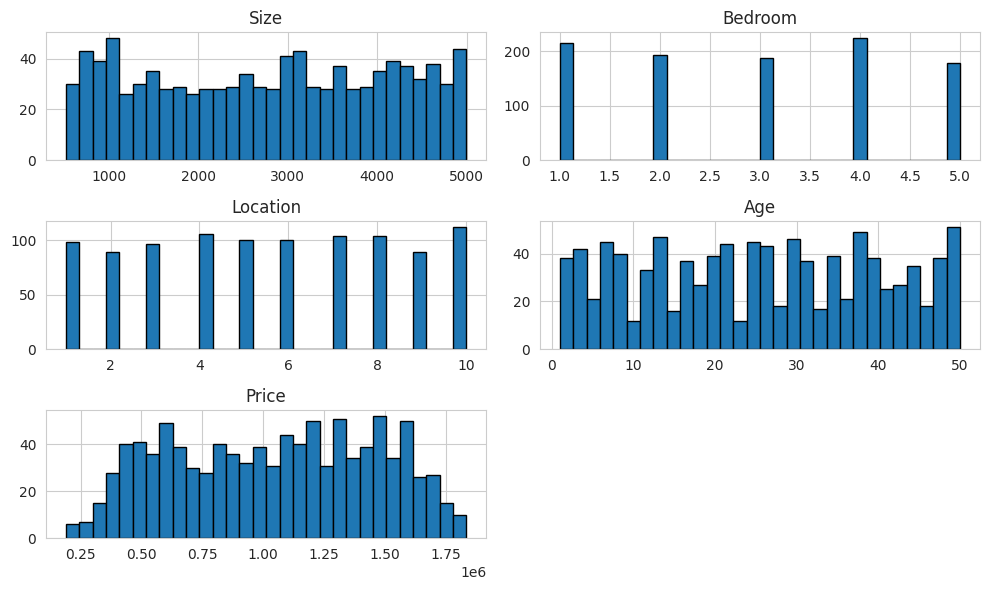

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set plot style
sns.set_style('whitegrid')

#plot feature distributions
df.hist(figsize=(10,6), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

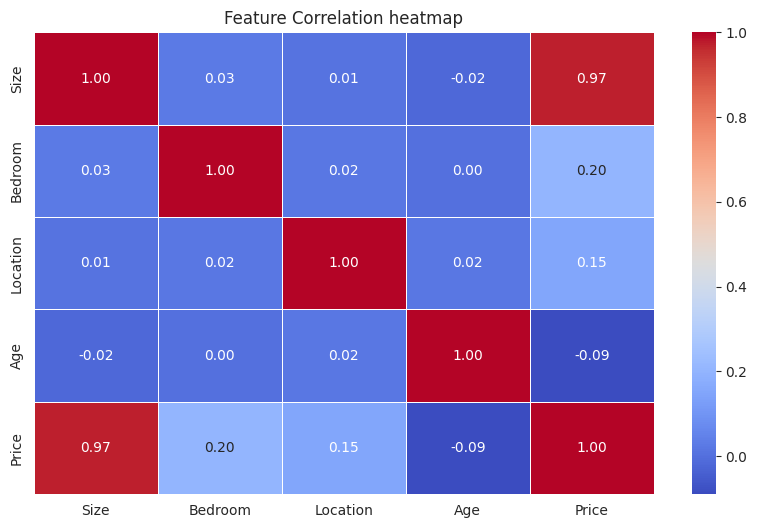

In [ ]:
#corelation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Feature Correlation heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#select feature and targets
X= df[["Size", "Bedroom", "Location", "Age"]]
y= df['Price']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

#train linear regression model
model= LinearRegression()
model.fit(X_train, y_train)

#make predictions on the test set
y_pred= model.predict(X_test)

#model performance
mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"\nModel Performance:\nMAE: {mae:.2f}, R^2 score: {r2:.2f}")


Model Performance:
MAE: 9881.75, R^2 score: 1.00


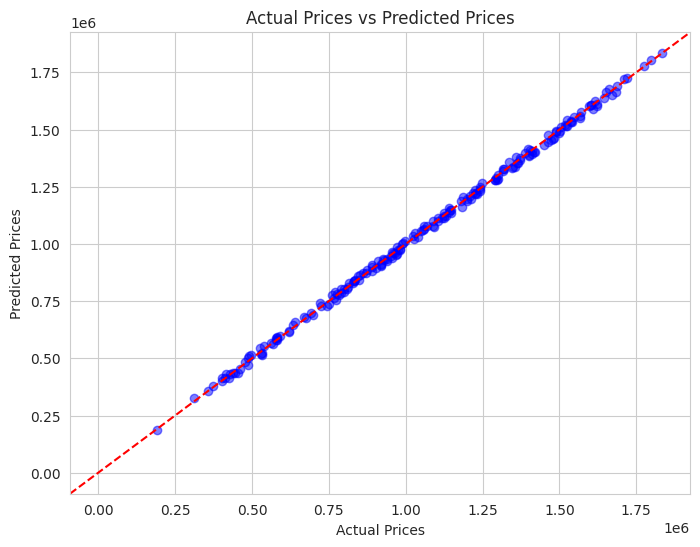

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.axline([0,0], slope=1, color='red', linestyle='--')
plt.show()